# 1. Import Packages and Define Functions

In [1]:
# Import some libraries that will be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import sys
sys.path.insert(1, '/Users/brianmccabe/DataScience/Flatiron/mod5/Emoji_Analysis/Scripts/')
import config
import warnings
warnings.filterwarnings('ignore')



pd.set_option('display.max_columns', 300)

%matplotlib inline

In [2]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
import string
import scipy
import emoji
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brianmccabe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/brianmccabe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/brianmccabe/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# we can define a function that removes stopwords 
def process_tweet(tweet):
    tweet = str(tweet).lower()
    tokens = nltk.word_tokenize(tweet)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stopwords]
    return stopwords_removed

In [4]:
#set stopwords and punctuations
stopwords = stopwords.words('english')
stopwords += list(string.punctuation)
stopwords += ["n't", "' '", "'re'","”","``","“","''","’","'s","'re","http","https"]

# 2. Load in Data from EDA Notebook

In [5]:
df = pd.read_csv("tweets.csv").drop('Unnamed: 0', axis=1)
emojis = pd.read_csv("emojis.csv")
df_all = pd.read_csv("tweets_w_all_emojis_present.csv").drop('emoji', axis=1)

In [6]:
df.head()

,tweet,sentiment_score,top_emoji,emoji_frequency
0,The Shadow Diaries with Madelaine Petsch and K...,0.0000,🌸,103
1,FREEEBOOKS Becky sees ghosts and she isn t afr...,-0.3716,🦉,37
2,One day honest citizens are going to stand up ...,0.8288,🤣,1553
3,a deep slow burning and highly engrossing read...,-0.6166,🌟,128
4,his next movie will deal with love in more exp...,0.9732,😍,790


In [7]:
emojis.head()

,top_emoji,sentiment_score,emoji_frequency
0,♥,0.782895,83
1,✨,0.583649,274
2,❤,0.136461,178
3,🌊,0.219962,66
4,🌎,0.083548,65


In [8]:
df_all.head()

,Unnamed: 0,tweet,unique_emoji_count,sentiment_score
0,0,""" cause hm? well, maybe \nchange is needed. yo...",0.0,0.3818
1,1,""" The Shadow Diaries"" with Madelaine Petsch an...",1.0,0.0000
2,2,""" well, i will 𝙨𝙩𝙞𝙡𝙡 thank you for it. ~\n\na...",0.0,0.8555
3,3,"""#FREEEBOOKS\nBecky sees ghosts... and she isn...",1.0,-0.3716
4,4,"""'One day, honest citizens are going to stand ...",1.0,0.8288


3. 

# KMeans Clustering

### Lemmatize

In [9]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer()

In [10]:
#apply above function to data

processed_tweets = list(map(process_tweet, df_all.tweet))

In [11]:
#create list with lemmatized output
lemmatized_output = []

for tweet in processed_tweets:
    lemmed = ' '.join([lemmatizer.lemmatize(w) for w in tweet])
    lemmatized_output.append(lemmed)

In [12]:
#change this to 'lemmatized_output' if you are including lemma (see above)
X_lem = lemmatized_output

In [13]:
tfidf = TfidfVectorizer(ngram_range=(1,1))

tfidf_data_train_lem = tfidf.fit_transform(X_lem)


tfidf_data_train_lem = pd.DataFrame(tfidf_data_train_lem.toarray(), columns=tfidf.vocabulary_.keys())



In [14]:
train_columns = tfidf_data_train_lem.columns
    
tfidf_data_train_lem = scipy.sparse.csr_matrix(tfidf_data_train_lem)

In [15]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA

In [17]:
from sklearn.cluster import KMeans

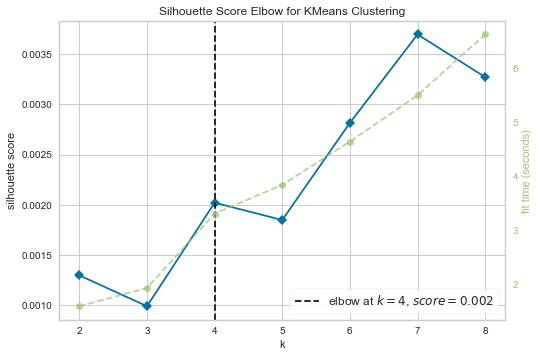

In [18]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,9), metric='silhouette')

visualizer.fit(tfidf_data_train_lem)        # Fit the data to the visualizer
visualizer.show()